In [1]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

import folium
import folium.plugins as plugins

In [2]:
business = []
with open('business.json') as json_file: 
    for line in json_file:
        #if i['categories'] and 'Restaurants' in i['categories']:
        business.append(json.loads(line))
        

In [4]:
tmp = []
for p in data:
     tmp.append(p['id'])
data = []
with open('review.json') as f:
    for line in f:
        if json.loads(line)['business_id'] in tmp:
            data.append(json.loads(line))
            

NameError: name 'data' is not defined

In [5]:
business = pd.DataFrame.from_records(business)

In [6]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


Text(0.5, 0, 'Ratings')

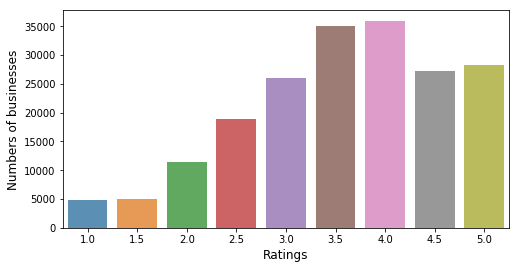

In [49]:
x = business['stars'].value_counts()
x = x.sort_index()
plt.figure(figsize=(8,4))
a = sns.barplot(x.index, x.values, alpha=0.8)
plt.ylabel('Numbers of businesses', fontsize=12)
plt.xlabel('Ratings', fontsize=12)

Text(0.5, 0, 'City')

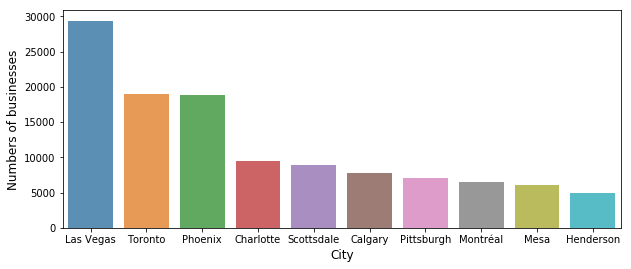

In [50]:
#Top 10 city
x = business['city'].value_counts()[0:10]
plt.figure(figsize=(10,4))
a = sns.barplot(x.index, x.values, alpha=0.8)
plt.ylabel('Numbers of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)


In [88]:
dat_toronto = business[business.city == 'Toronto']
data = []
stars_list = list(dat_toronto['stars'].unique())
for star in stars_list:
    subset = dat_toronto[dat_toronto['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
#initial
lat = 43.65
lon = -79.4
zoom_start=12.5

m = folium.Map(location=[lat, lon], zoom_start=zoom_start)
heat = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)
heat.add_to(m)
m



Text(0.5, 0, 'City')

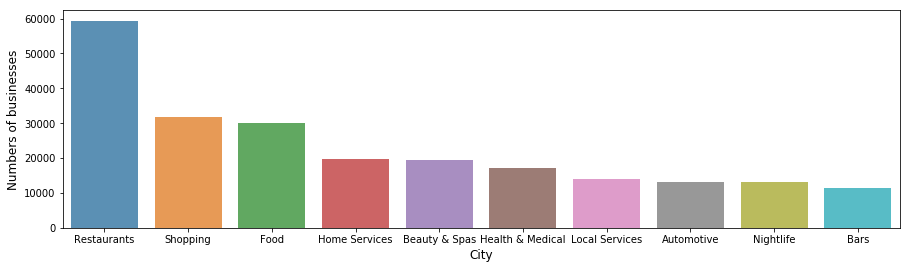

In [191]:
count = business.categories.str.cat(sep =", ")
count = count.split(', ')
from collections import Counter
res = Counter(count)

d = dict(res.most_common()[0:10])

plt.figure(figsize=(15,4))
a = sns.barplot(list(d.keys()), list(d.values()), alpha=0.8)
plt.ylabel('Numbers of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

In [192]:
#Frequency of top 10 categories
d

{'Restaurants': 59371,
 'Shopping': 31878,
 'Food': 29989,
 'Home Services': 19729,
 'Beauty & Spas': 19370,
 'Health & Medical': 17171,
 'Local Services': 13932,
 'Automotive': 13203,
 'Nightlife': 13095,
 'Bars': 11341}

In [193]:
restaurant = business[business.categories.str.contains('Restaurants',na=False)]

Text(0.5, 0, 'City')

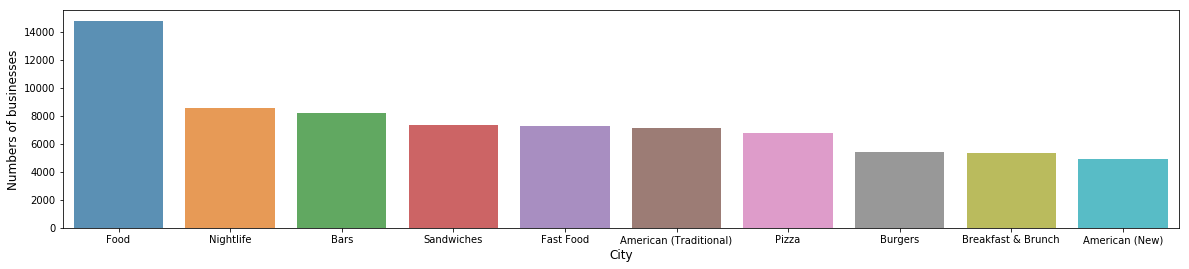

In [194]:
count = restaurant.categories.str.cat(sep =", ")
count = count.split(', ')
from collections import Counter
res = Counter(count)
d = dict(res.most_common()[1:11])

plt.figure(figsize=(20,4))
a = sns.barplot(list(d.keys()), list(d.values()), alpha=0.8)
plt.ylabel('Numbers of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

In [196]:
res.most_common()[1:21]

[('Food', 14800),
 ('Nightlife', 8562),
 ('Bars', 8182),
 ('Sandwiches', 7332),
 ('Fast Food', 7257),
 ('American (Traditional)', 7107),
 ('Pizza', 6804),
 ('Burgers', 5404),
 ('Breakfast & Brunch', 5381),
 ('American (New)', 4882),
 ('Italian', 4716),
 ('Mexican', 4618),
 ('Chinese', 4428),
 ('Coffee & Tea', 3647),
 ('Cafes', 3232),
 ('Japanese', 2716),
 ('Chicken Wings', 2705),
 ('Event Planning & Services', 2685),
 ('Salad', 2531),
 ('Seafood', 2508)]

In [201]:
# night life to extract reviews 
def extract_cat(file, cat): # file: file_address, str. 
    data = []
    tmp = business[business.categories.str.contains(cat, na = False)].business_id.to_list()
    with open(file) as f:
        for line in f:
            if json.loads(line)['business_id'] in tmp:
                data.append(json.loads(line))
    return data

In [203]:
dat = extract_cat('review.json', 'Nightlife')

In [ ]:
#df2 = pd.DataFrame.from_records(res)
#df2 = df2.drop(['cool', 'date','user_id','review_id'], axis=1)
#df = df.rename(columns={"stars": "avg_stars"})
#restaurants_reviews = pd.merge(df, df2, on = 'business_id')        


In [8]:
data = []
tmp = business[business.categories.str.contains('Nightlife', na = False)]

In [9]:
tmp = business[business.review_count >= 300].business_id.to_list()

In [13]:
with open('review.json') as f:
    for line in f:
        if json.loads(line)['business_id'] in tmp:
            data.append(json.loads(line))

In [16]:
#df2 = pd.DataFrame.from_records(res)
data = pd.DataFrame.from_records(data)
df = data.drop(['cool', 'date','user_id','review_id'], axis=1)


In [18]:
df = df.drop(['business_id', 'funny', 'useful'], axis=1)

In [19]:
df.to_csv('nightlife.csv',index=False)